# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology


In [51]:
#@title Enter your information & "RUN the cell!!"
student_id =  400100973 #@param {type:"integer"}
student_name = "Nima Haji" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400100973
your name: Nima Haji


##Exercise Outline :
This exercise consist of two parts: in the first part, we would practice our python skills and also learn some basic analyzing tools. In the second part, we would get familiar with some neuron models which you may have seen before in the course. You have to complete and deliver the .ipynb file and a report describing your result. Grades will be given based on your report and your code.


## Importing Libraries

First we import libraries that we need for this assignment.

In [31]:
##################################
# add all necessary packages here
##################################
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio

#** PART I**

Fourier trnasform


One important technique to characterize rhythms in data is the Fourier transform. This powerful tool, allows us to observe the frequency spectrum of the data. Search about fft and describe it in your report.

*`10 Points`*

Now let's see how it works in action. Produce a sinusoidal wave with $f = 10Hz$. Then add another sinusoidal wave with $f = 20Hz$. Use numpy's or scipy's fft functions to show the frequency spectrum.

*`10 Points`*

C:\Users\asus\AppData\Local\Temp\ipykernel_19080\2900765819.py:30: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")


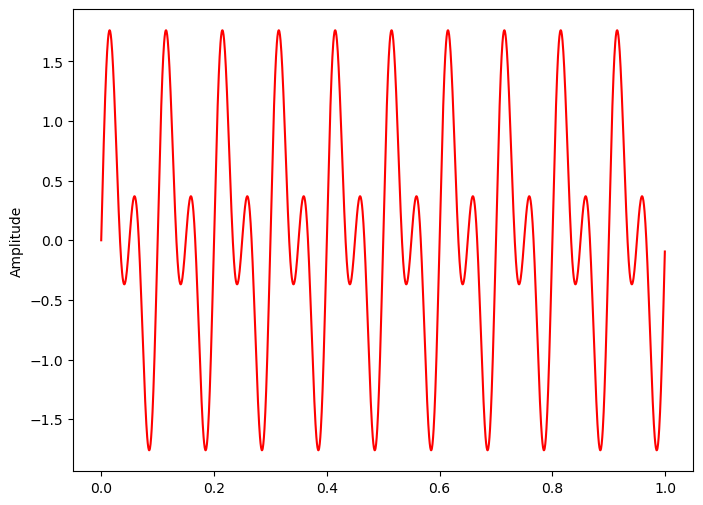

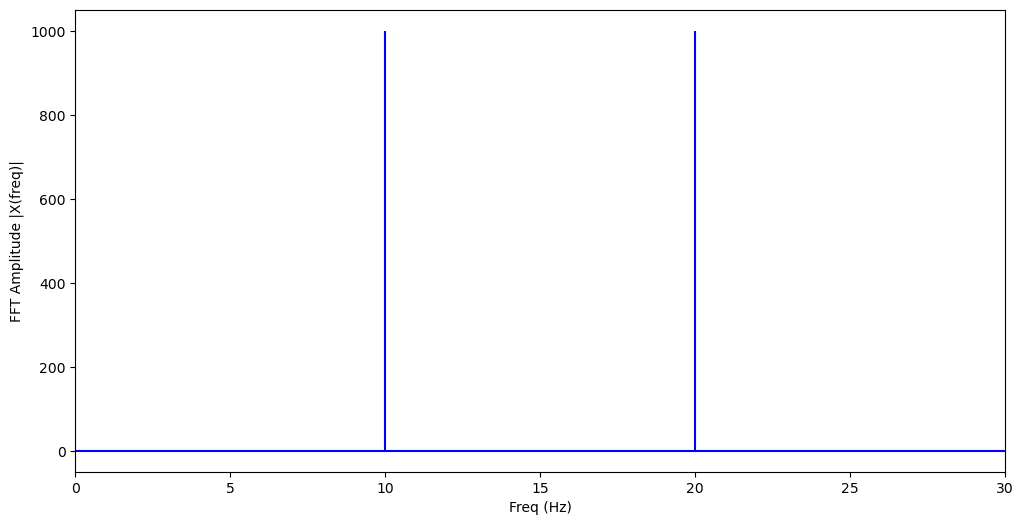

In [10]:
### START CODE HERE ###


sr = 2000
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 10
x = np.sin(2*np.pi*freq*t)

freq = 20
x += np.sin(2*np.pi*freq*t)


plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')


from numpy.fft import fft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 30)


plt.show()



### END CODE HERE ###

Search about Gaussian white noise and secribe it in your report.

*`10 points`*

Now corrupt the data with this noise and show the frequency spectrum.

*`10 points`*

C:\Users\asus\AppData\Local\Temp\ipykernel_19080\298113958.py:21: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq1, np.abs(X_noisy), 'b', markerfmt=" ", basefmt="-b")


<function matplotlib.pyplot.show(close=None, block=None)>

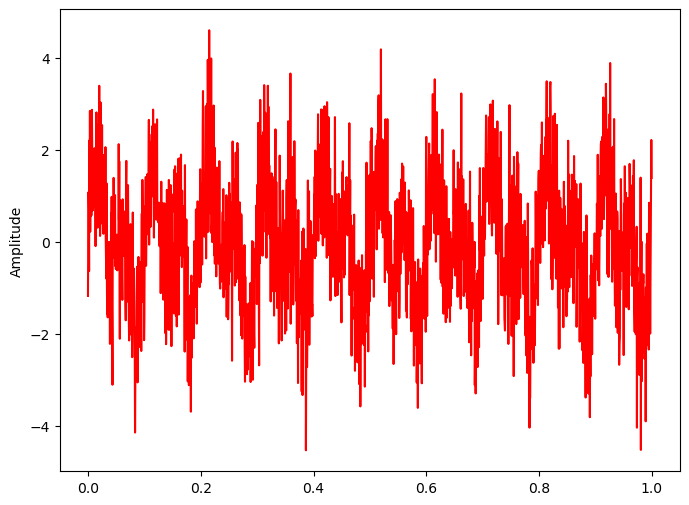

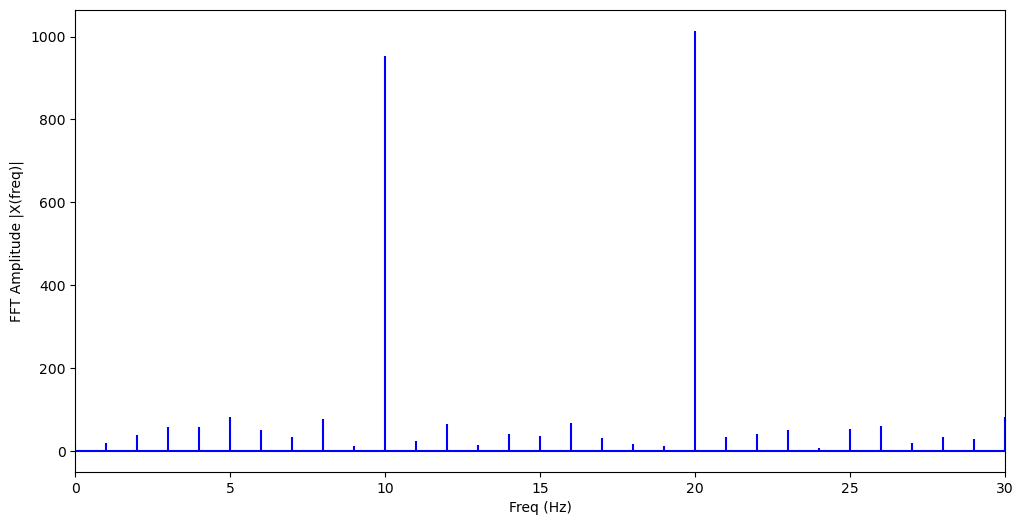

In [11]:
### START CODE HERE ###

mean = 0
std = 1 
noise = np.random.normal(mean, std, size=sr)

x_noisy = x+noise

plt.figure(figsize = (8, 6))
plt.plot(t, x_noisy, 'r')
plt.ylabel('Amplitude')

X_noisy = fft(x_noisy)
N1 = len(X_noisy)
n1 = np.arange(N1)
T1 = N1/sr
freq1 = n1/T1 

plt.figure(figsize = (12, 6))

plt.stem(freq1, np.abs(X_noisy), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 30)

plt.show

### END CODE HERE ###

##Bonus:

Search about cross spectrum and describe it in your report. Then calculate and plot the cross power spectral density between the given signals. Describe the reuslts in your report. What does $np.random.seed$ do?



*`15 points`*

In [ ]:
np.random.seed(seed=73)
firstSigFreqs = np.random.randint(1, 100, 5)
secondSigFreqs = np.random.randint(1, 100, 5)
time = np.arange(0, 1, .001)

x = np.zeros(1000)
y = np.zeros(1000)

for freq in (firstSigFreqs):
  x += np.sin(2*np.pi*time*freq)

for freq in (secondSigFreqs):
  y += np.sin(2*np.pi*time*freq)


### START CODE HERE ###
...
### END CODE HERE ###

#** PART II**

#The Leaky Integrate-and-Fire (LIF) model

Now, let's implement one of the simplest mathematical model of a neuron: the leaky integrate-and-fire (LIF) model. The basic idea of LIF neuron was proposed in 1907 by Louis Édouard Lapicque, long before we understood the electrophysiology of a neuron.

The subthreshold membrane potential dynamics of a LIF neuron is described by

\begin{eqnarray}
C_m\frac{dV}{dt} = -g_L(V-E_L) + I,\quad (1)
\end{eqnarray}

Dividing both sides of the above equation by $g_L$ gives

\begin{align}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,,\quad (2)
\end{align}


What are the parameters of the the equation? Describe them in your report. What are the results of altering them numerically?


*`10 points`*

Now let's implement this model. For this purpose, we have to solve this equation numerically. Search about Euler's method and describe it in your report.

*`10 points`*

A dictionary is given to initialize the parameters of the simulation. Simulate this model using Euler's method. Inject different values of external current and describe the resutls. Don't forget to add a horizontal line to indicate the threshold level.

In [32]:
pars = {}
pars['V_th'] = -55.
pars['V_reset'] = -75.
pars['tau_m'] = 10.
pars['g_L'] = 10.
pars['V_init'] = -75.
pars['E_L'] = -75.
pars['tref'] = 2. # refractory time (ms)


pars['T'] = 400.  # Total duration of simulation [ms]
pars['dt'] = .1   # Simulation time step [ms]



pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

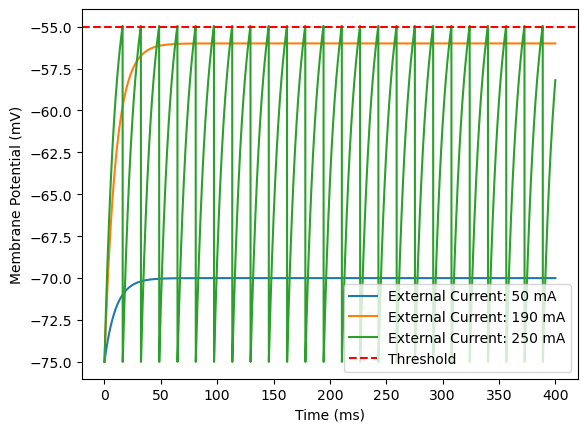

In [37]:
### START CODE HERE ###

I = [50,190,250] 

def run_LIF(pars, I):
    
    # Set parameters
    V_th, V_reset = pars['V_th'], pars['V_reset']   
    tau_m, g_L = pars['tau_m'], pars['g_L']        
    V_init, E_L = pars['V_init'], pars['E_L']       
    dt, range_t = pars['dt'], pars['range_t'] 
    Lt = range_t.size 
    tref = pars['tref']
    
    # Initialize voltage and current 
    v = np.zeros(Lt)
    v[0] = V_init 

    # simulate the LIF dynamics 

    for i in range(Lt-1):
      if v[i] >= V_th:
            v[i+1] = V_reset
      else :        
          #calculate the increment of the membrane potential
          dv = (-(v[i]-E_L) + I/g_L) * (dt/tau_m)
        
          #update the membrane potential
          v[i+1] = v[i] + dv
  
    return v


plt.figure()
for current in I:
    V = run_LIF(pars, current)
    plt.plot(pars['range_t'], V, label=f'External Current: {current} mA')
plt.axhline(y=pars['V_th'], color='r', linestyle='--', label='Threshold')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()

### END CODE HERE ###

##Bonus:

Create a gif!
Each frame contains a solved and plotted simulation. Alter the injected current in each frame and you will see an incredible result!


*`15 points`*

In [38]:
### START CODE HERE ###

frames = []
for current in I:
    V = run_LIF(pars, current)
    plt.plot(pars['range_t'], V, label=f'External Current: {current} mA')
    plt.axhline(y=pars['V_th'], color='r', linestyle='--', label='Threshold')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.legend()
    plt.savefig('frame.png')
    plt.close()

    frames.append(imageio.imread('frame.png'))
# Save the frames as a GIF
imageio.mimsave('simulation.gif', frames, duration=1000)

### END CODE HERE ###

C:\Users\asus\AppData\Local\Temp\ipykernel_19080\2414860580.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread('frame.png'))


OverflowError: int too big to convert

#The Hodgkin-Huxley model

The Hodgkin–Huxley model, or conductance-based model, is a mathematical model that describes how action potentials in neurons are initiated and propagated. It is a set of nonlinear differential equations that approximates the electrical characteristics of excitable cells such as neurons and muscle cells. It is a continuous-time dynamical system.

4 equations of Hodgkin-Huxley model  
* $C_M\displaystyle \frac{dV}{dt}=-g_{Na}(V-V_{Na})-g_k(V-V_K)-g_l(V-V_l)+I$ ($V$: Membrane Potential)  
* $\displaystyle \frac{dh}{dt}=\alpha_h{(V)}(1-h)-\beta_h(V)h$ ($h$: Na Inactivation)  
* $\displaystyle \frac{dm}{dt}=\alpha_m{(V)}(1-m)-\beta_m(V)m$ ($m$: Na Activation)  
* $\displaystyle \frac{dn}{dt}=\alpha_n{(V)}(1-n)-\beta_n(V)n$ ($n$: K Activation)  

Describe the parameters in your report.

*`10 points`*

Now let's implement this model. Some of the functions are given. Use Euler's method or any other method to solve this equaiton for the given parametrs. Choose the injected current wisely.

*`15 points`*

In [47]:
def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

dt = 0.01;
T0 = 100
T  = math.ceil(T0/dt)  # [ms]


t = np.arange(0,T)*dt



gNa0 = 120   # [mS/cm^2]
ENa  = 115;  # [mV]
gK0  = 36;   # [mS/cm^2]
EK   = -12;  # [mV]
gL0  = 0.3;  # [mS/cm^2]
EL   = 10.6; # [mV]
CM=100

In [48]:
### START CODE HERE ###

Lt = t.size 
v = np.zeros(Lt)
h = np.zeros(Lt)
m = np.zeros(Lt)
n = np.zeros(Lt)
I = 10

v[0] = -65  # initial membrane potential [mV]
h[0] = alphaH(v[0]) / (alphaH(v[0]) + betaH(v[0]))  # initial Na inactivation
m[0] = alphaM(v[0]) / (alphaM(v[0]) + betaM(v[0]))  # initial Na activation
n[0] = alphaN(v[0]) / (alphaN(v[0]) + betaN(v[0]))  # initial K activation


for it in range(Lt-1):
    dv = (-gNa0*(v[it]-ENa)+ -gK0*(v[it]-EK) + -gL0*(v[it]-EL) + I) * (dt/CM)   
    v[it+1] = v[it] + dv
                              
    dh = (alphaH(v[it])*(1-h[it])) - (betaH(v[it])*(h[it])) * (dt) 
    h[it+1] = h[it] + dh
    dm = (alphaM(v[it])*(1-m[it])) - (betaM(v[it])*(m[it])) * (dt) 
    m[it+1] = m[it] + dm
    dn = (alphaN(v[it])*(1-n[it])) - (betaN(v[it])*(n[it])) * (dt) 
    n[it+1] = n[it] + dn
                              
### END CODE HERE ###

C:\Users\asus\AppData\Local\Temp\ipykernel_19080\2684530885.py:22: RuntimeWarning: overflow encountered in double_scalars
  dm = (alphaM(v[it])*(1-m[it])) - (betaM(v[it])*(m[it])) * (dt)
C:\Users\asus\AppData\Local\Temp\ipykernel_19080\2684530885.py:23: RuntimeWarning: invalid value encountered in double_scalars
  m[it+1] = m[it] + dm


Now plot all 4 solved equations! What are the dynamics of these equations? Describe it in your report.

*`20 points`*

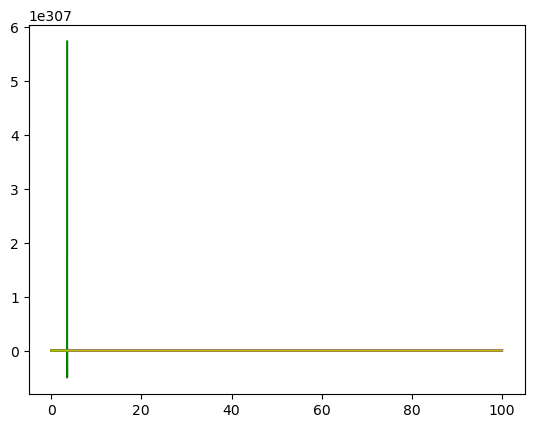

In [49]:
### START CODE HERE ###
plt.plot(t, v, 'r')
plt.plot(t, h, 'b')
plt.plot(t, m, 'g')
plt.plot(t, n, 'y')
### END CODE HERE ###